In [ ]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


: 

In [ ]:
heart =pd.read_csv("/content/heart.csv")

: 

In [ ]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


: 

In [4]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
heart.value_counts()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
38   1    2   138       175   0    1        173      0      0.0      2      4   2     1         8
61   1    0   148       203   0    1        161      0      0.0      2      1   3     0         4
              138       166   0    0        125      1      3.6      1      1   2     0         4
52   1    0   112       230   0    1        160      0      0.0      2      1   2     0         4
              125       212   0    1        168      0      1.0      2      2   3     0         4
                                                                                               ..
53   0    0   130       264   0    0        143      0      0.4      1      0   2     1         3
              138       234   0    0        160      0      0.0      2      0   2     1         3
          2   128       216   0    0        115      0      0.0      2      0   0     1         3
     1    0   142       2

#visuvalize

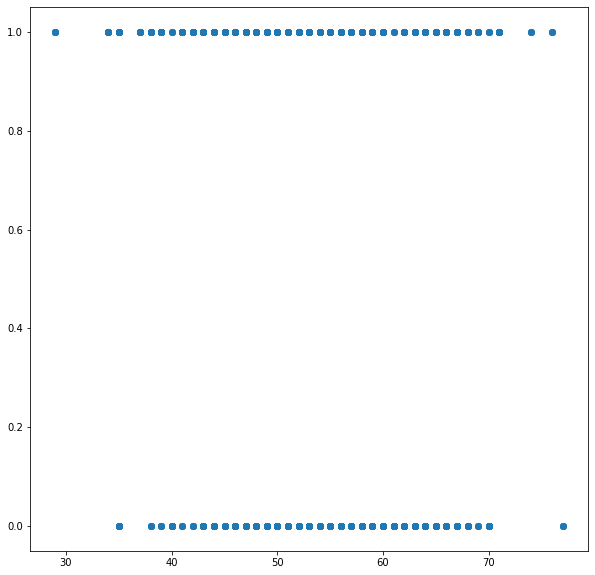

In [14]:
plt.figure(figsize=(10,10))
plt.scatter(x="age",y="target",data=heart)


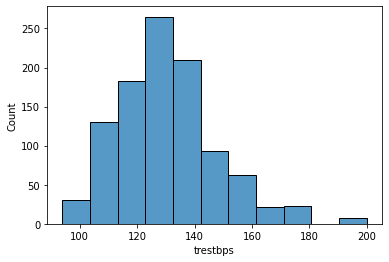

In [15]:
sns.histplot(heart.trestbps,bins=11)



In [16]:
fig=px.bar(heart,heart["trestbps"],heart["target"])
fig.show()

In [17]:
fig=px.pie(heart,heart["target"])
fig.show()

In [19]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [24]:
#datasplitting
x=heart.drop(['sex', 'cp', 'thalach','oldpeak','exang','slope','target'], axis=1)
y=heart['target']

In [25]:
x.shape,y.shape

((1025, 7), (1025,))

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [30]:
x_train.shape,x_test.shape

((820, 7), (205, 7))

In [31]:
y_train.shape,y_test.shape

((820,), (205,))

In [35]:

#model  building
from sklearn.naive_bayes import GaussianNB


In [36]:
model=GaussianNB()
model.fit(x,y)

GaussianNB()

In [37]:
y_pred=model.predict(x_test)

In [38]:
#check the performance
from sklearn import metrics
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

accuracy: 0.7414634146341463


In [41]:
#pickle
import pickle as pkl
pickle_out = open("model.pickle", "wb")
pkl.dump(model, pickle_out)
pickle_out.close()